In [ ]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.optimizers import SGD
from keras_visualizer import visualizer 
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from google.colab.patches import cv2_imshow
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import initializers


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv', sep=';', encoding="ISO-8859-1")

tratamento dos dados

In [ ]:
aux = df[df.CO_PROVA_MT == 899] #somente quem fez a prova azul

In [ ]:
notas = aux['NU_NOTA_MT']
notas = notas.dropna()

In [ ]:
respostas = aux['TX_RESPOSTAS_MT']
respostas = respostas.dropna()

In [ ]:
gabarito = aux['TX_GABARITO_MT']
gabarito = gabarito.dropna()

In [ ]:
data = pd.concat([notas, respostas, gabarito], axis=1)

Removendo os gabaritos que nao obtiveram nenhuma resposta

In [ ]:
data['TX_RESPOSTAS_MT'] = data['TX_RESPOSTAS_MT'].apply(lambda x: list(x))
data['TX_GABARITO_MT'] = data['TX_GABARITO_MT'].apply(lambda x: list(x))

In [ ]:
def DiffLetters(a,b):
    sum = 0
    for i in range(len(a)):
      if a[i] == b[i]:
        sum += 1
    return sum

In [ ]:
def VetorDeAcerto(a, b):
  aux = []
  for i in range(len(a)):
    if a[i] == b[i]:
      aux.append(1)
    else:
      aux.append(0)
  return aux

In [ ]:
data['VETOR_DE_ACERTO'] = data.apply(lambda row: VetorDeAcerto(row.TX_RESPOSTAS_MT, row.TX_GABARITO_MT), axis=1)

In [ ]:
data['QT_ACERTOS'] = data.apply(lambda row: sum(row.VETOR_DE_ACERTO), axis=1)

In [ ]:
acertos = list(data['VETOR_DE_ACERTO'])

In [ ]:
notaFinal = list(data['NU_NOTA_MT'])

In [ ]:
X = np.array(acertos)
y = np.array(notaFinal)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [ ]:
def TrainModel(model, epochs, batch_size):
  history = model.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(X_val, y_val))
  return model, history

In [ ]:
def SetModel():
  model = keras.Sequential(
      [
          keras.Input(shape=(45)),
          layers.Dense(32, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()),
          layers.Dense(1),
      ]
  )
  return model

In [ ]:
def Train(momentum=0, epochs=10, batch_size=128):
  model = SetModel()

  model.compile(loss='mse', metrics=['mae'], optimizer=SGD(name="SGD", learning_rate=0.0001, momentum=momentum))

  model, history = TrainModel(model, epochs, batch_size)
  
  model.summary()

  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Training loss")
  ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['mae'], color='b', label="Training Mean Absolute Error")
  ax[1].plot(history.history['val_mae'], color='r',label="Validation Mean Absolute Error")
  legend = ax[1].legend(loc='best', shadow=True)

  print(history.history['val_mae'][-1])

  return model, history


In [ ]:
modelos = []

modelo 1 32 neuronios

Epoch 1/15
2920/2920 [==============================] - 10s 3ms/step - loss: 1811.6772 - mae: 17.7436 - val_loss: 319.7091 - val_mae: 12.9704
Epoch 2/15
2920/2920 [==============================] - 10s 4ms/step - loss: 322.7621 - mae: 12.9554 - val_loss: 319.8704 - val_mae: 12.9656
Epoch 3/15
2920/2920 [==============================] - 10s 4ms/step - loss: 322.2522 - mae: 12.9409 - val_loss: 318.0053 - val_mae: 12.9860
Epoch 4/15
2920/2920 [==============================] - 10s 3ms/step - loss: 319.6206 - mae: 12.8800 - val_loss: 312.9106 - val_mae: 12.8166
Epoch 5/15
2920/2920 [==============================] - 9s 3ms/step - loss: 304.8406 - mae: 12.5135 - val_loss: 290.5174 - val_mae: 12.2347
Epoch 6/15
2920/2920 [==============================] - 10s 3ms/step - loss: 252.1008 - mae: 11.1815 - val_loss: 208.7069 - val_mae: 10.1617
Epoch 7/15
2920/2920 [==============================] - 9s 3ms/step - loss: 173.7386 - mae: 9.1218 - val_loss: 140.7947 - val_mae: 8.2779
Epoch 8/15
2920/

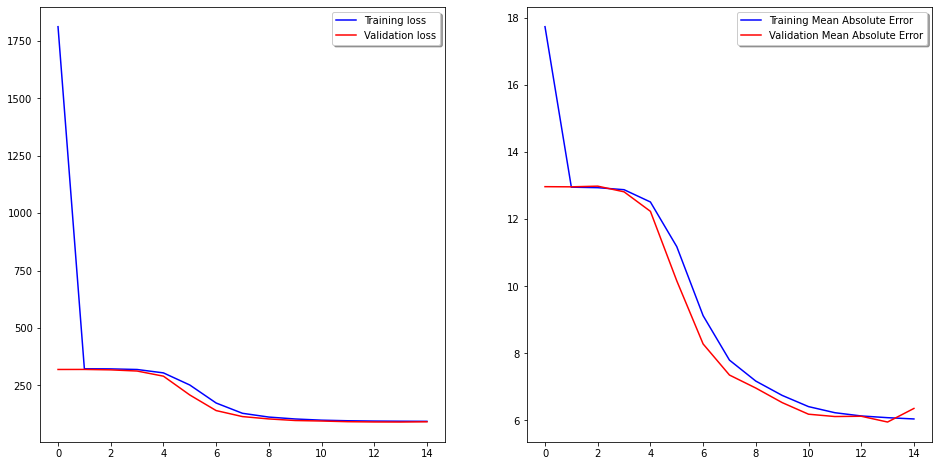

In [ ]:
model, history = Train(epochs=15)
modelos.append([model, history])

In [ ]:
def SetModel():
  model = keras.Sequential(
      [
          keras.Input(shape=(45)),
          layers.Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()),
          layers.Dense(1),
      ]
  )
  return model

modelo 2 128 neuronios

Epoch 1/15
2920/2920 [==============================] - 12s 4ms/step - loss: 1850.6921 - mae: 17.8090 - val_loss: 327.9907 - val_mae: 13.2197
Epoch 2/15
2920/2920 [==============================] - 9s 3ms/step - loss: 322.4473 - mae: 12.9471 - val_loss: 322.4066 - val_mae: 13.0101
Epoch 3/15
2920/2920 [==============================] - 9s 3ms/step - loss: 319.7548 - mae: 12.8822 - val_loss: 312.5525 - val_mae: 12.8506
Epoch 4/15
2920/2920 [==============================] - 10s 3ms/step - loss: 305.4996 - mae: 12.5333 - val_loss: 285.2527 - val_mae: 12.1016
Epoch 5/15
2920/2920 [==============================] - 9s 3ms/step - loss: 253.6163 - mae: 11.2185 - val_loss: 209.2558 - val_mae: 10.2122
Epoch 6/15
2920/2920 [==============================] - 9s 3ms/step - loss: 174.9545 - mae: 9.1566 - val_loss: 141.5133 - val_mae: 8.3066
Epoch 7/15
2920/2920 [==============================] - 9s 3ms/step - loss: 129.4168 - mae: 7.8130 - val_loss: 114.5518 - val_mae: 7.4163
Epoch 8/15
2920/2920 

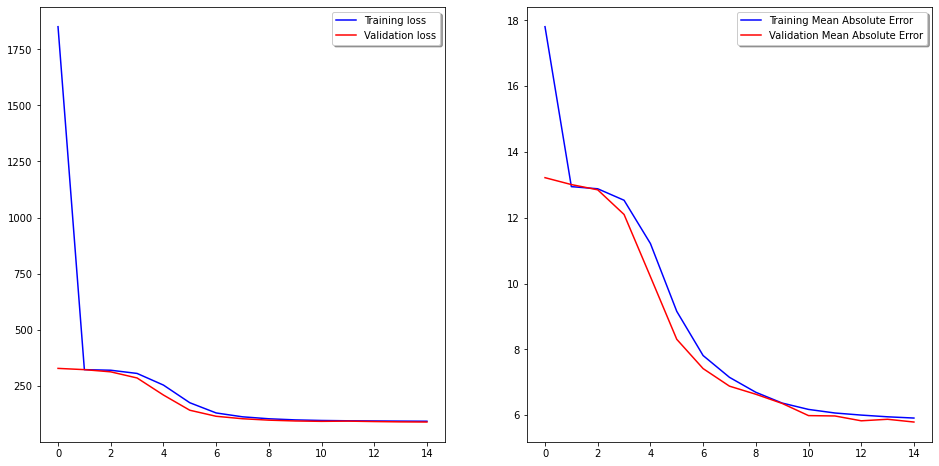

In [ ]:
model, history = Train(epochs=15)
modelos.append([model, history])

In [ ]:
def SetModel():
  model = keras.Sequential(
      [
          keras.Input(shape=(45)),
          layers.Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()),
          layers.Dense(1),
      ]
  )
  return model

modelo 3 512 neuronios

Epoch 1/20
2920/2920 [==============================] - 11s 4ms/step - loss: 1899.2476 - mae: 17.9109 - val_loss: 322.0374 - val_mae: 12.9193
Epoch 2/20
2920/2920 [==============================] - 10s 3ms/step - loss: 322.4844 - mae: 12.9440 - val_loss: 322.7241 - val_mae: 12.9677
Epoch 3/20
2920/2920 [==============================] - 11s 4ms/step - loss: 321.0221 - mae: 12.9122 - val_loss: 315.2449 - val_mae: 12.8537
Epoch 4/20
2920/2920 [==============================] - 10s 3ms/step - loss: 311.9005 - mae: 12.6881 - val_loss: 297.4401 - val_mae: 12.4491
Epoch 5/20
2920/2920 [==============================] - 10s 3ms/step - loss: 273.2794 - mae: 11.7265 - val_loss: 233.7228 - val_mae: 10.8077
Epoch 6/20
2920/2920 [==============================] - 10s 3ms/step - loss: 195.7321 - mae: 9.7176 - val_loss: 156.1659 - val_mae: 8.7410
Epoch 7/20
2920/2920 [==============================] - 10s 3ms/step - loss: 138.2020 - mae: 8.0945 - val_loss: 119.3596 - val_mae: 7.5582
Epoch 8/20
2920/

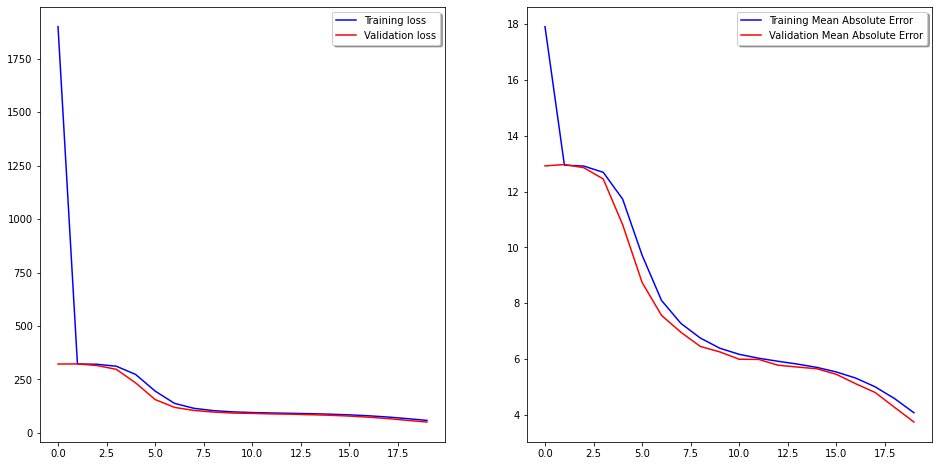

In [ ]:
model, history = Train(epochs=20)
modelos.append([model, history])

In [ ]:
def SetModel():
  model = keras.Sequential(
      [
          keras.Input(shape=(45)),
          layers.Dense(1024, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()),
          layers.Dense(1),
      ]
  )
  return model

Modelo 4 1024 ReLu

Epoch 1/50
2920/2920 [==============================] - 10s 3ms/step - loss: 1877.3295 - mae: 17.8845 - val_loss: 322.2374 - val_mae: 13.0181
Epoch 2/50
2920/2920 [==============================] - 11s 4ms/step - loss: 322.6412 - mae: 12.9510 - val_loss: 319.0345 - val_mae: 12.9626
Epoch 3/50
2920/2920 [==============================] - 10s 4ms/step - loss: 321.6150 - mae: 12.9244 - val_loss: 316.5812 - val_mae: 12.9238
Epoch 4/50
2920/2920 [==============================] - 10s 3ms/step - loss: 315.6640 - mae: 12.7825 - val_loss: 304.6084 - val_mae: 12.5180
Epoch 5/50
2920/2920 [==============================] - 11s 4ms/step - loss: 287.5251 - mae: 12.0794 - val_loss: 254.8438 - val_mae: 11.3667
Epoch 6/50
2920/2920 [==============================] - 10s 3ms/step - loss: 216.2681 - mae: 10.2565 - val_loss: 172.7639 - val_mae: 9.1924
Epoch 7/50
2920/2920 [==============================] - 11s 4ms/step - loss: 148.4893 - mae: 8.3966 - val_loss: 125.2838 - val_mae: 7.8428
Epoch 8/50
2920

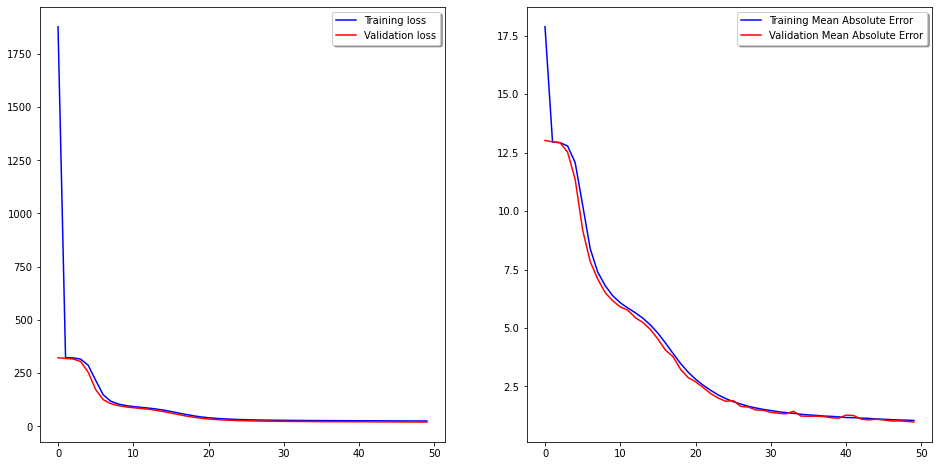

In [ ]:
model, history = Train(epochs=50)
modelos.append([model, history])

modelo 5 2 camadas 512

In [ ]:
def SetModel():
  model = keras.Sequential(
      [
          keras.Input(shape=(45)),
          layers.Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()),
          layers.Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()),
          layers.Dense(1),
      ]
  )
  return model

Epoch 1/50
2920/2920 [==============================] - 11s 4ms/step - loss: 181723.8906 - mae: 406.3903 - val_loss: 102004.0625 - val_mae: 300.1037
Epoch 2/50
2920/2920 [==============================] - 10s 4ms/step - loss: 64764.1211 - mae: 226.8664 - val_loss: 40076.3203 - val_mae: 167.8157
Epoch 3/50
2920/2920 [==============================] - 11s 4ms/step - loss: 28330.5586 - mae: 132.1559 - val_loss: 20773.0527 - val_mae: 109.1462
Epoch 4/50
2920/2920 [==============================] - 12s 4ms/step - loss: 17001.7852 - mae: 99.0628 - val_loss: 14747.2549 - val_mae: 93.8246
Epoch 5/50
2920/2920 [==============================] - 11s 4ms/step - loss: 13478.7891 - mae: 91.1445 - val_loss: 12858.2285 - val_mae: 90.4675
Epoch 6/50
2920/2920 [==============================] - 10s 4ms/step - loss: 12384.1377 - mae: 89.7251 - val_loss: 12264.1299 - val_mae: 90.0883
Epoch 7/50
2920/2920 [==============================] - 11s 4ms/step - loss: 12043.7500 - mae: 89.7777 - val_loss: 12074.8

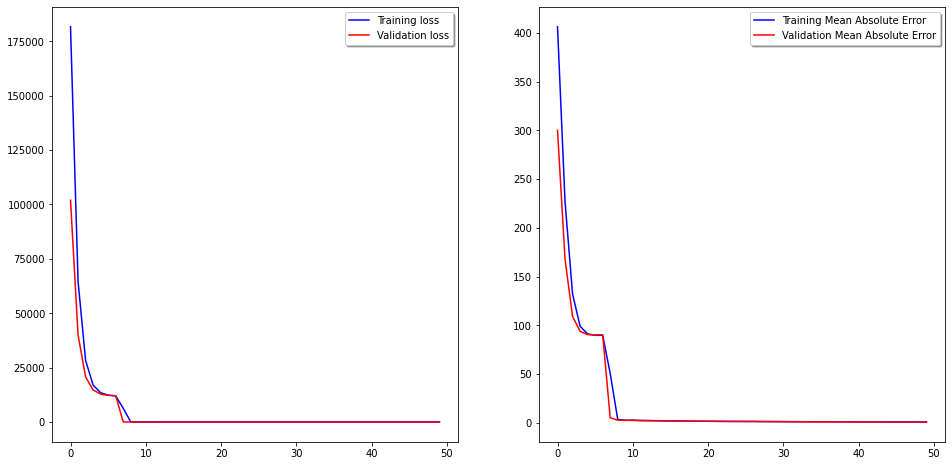

In [ ]:
model, history = Train(epochs=50, momentum=0)
modelos.append([model, history])

modelo 6 2 camadas 512 com momentum 0.9

Epoch 1/50
2920/2920 [==============================] - 11s 4ms/step - loss: 4173.5098 - mae: 26.6530 - val_loss: 367.7325 - val_mae: 14.2691
Epoch 2/50
2920/2920 [==============================] - 11s 4ms/step - loss: 231.2512 - mae: 11.2811 - val_loss: 170.2660 - val_mae: 10.6690
Epoch 3/50
2920/2920 [==============================] - 12s 4ms/step - loss: 135.2158 - mae: 8.6174 - val_loss: 85.1070 - val_mae: 7.3819
Epoch 4/50
2920/2920 [==============================] - 10s 4ms/step - loss: 98.6246 - mae: 7.3411 - val_loss: 57.3813 - val_mae: 5.8486
Epoch 5/50
2920/2920 [==============================] - 10s 4ms/step - loss: 83.6652 - mae: 6.6700 - val_loss: 192.6466 - val_mae: 12.6708
Epoch 6/50
2920/2920 [==============================] - 10s 4ms/step - loss: 70.4554 - mae: 6.0058 - val_loss: 60.5033 - val_mae: 6.4609
Epoch 7/50
2920/2920 [==============================] - 10s 4ms/step - loss: 59.1902 - mae: 5.4868 - val_loss: 28.5865 - val_mae: 4.1425
Epoch 8/50
2920/2920 [=======

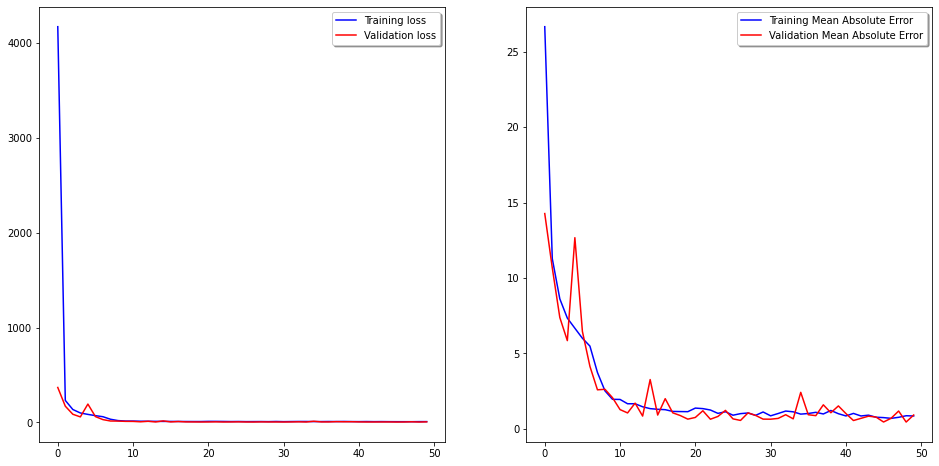

In [ ]:
model, history = Train(epochs=50, momentum=0.9)
modelos.append([model, history])

In [ ]:
def SetModel():
  model = keras.Sequential(
      [
          keras.Input(shape=(45)),
          layers.Dense(
              512, 
              activation='relu', 
              kernel_initializer=initializers.RandomNormal(stddev=0.01), 
              bias_initializer=initializers.Zeros()),
            layers.Dense(
              512, 
              activation='relu', 
              kernel_initializer=initializers.RandomNormal(stddev=0.01), 
              bias_initializer=initializers.Zeros(), 
              activity_regularizer=regularizers.L2(0.01)),
          layers.Dense(1),
      ]
  )
  return model

modelo 7 2 camadas 512 com momentum 0.9 e l2 de 0.01

Epoch 1/50
2920/2920 [==============================] - 12s 4ms/step - loss: 38714.7109 - mae: 142.5842 - val_loss: 11984.5566 - val_mae: 90.8689
Epoch 2/50
2920/2920 [==============================] - 11s 4ms/step - loss: 11890.3057 - mae: 90.6193 - val_loss: 11981.1748 - val_mae: 91.0068
Epoch 3/50
2920/2920 [==============================] - 12s 4ms/step - loss: 11890.0967 - mae: 90.6489 - val_loss: 11981.4023 - val_mae: 90.9877
Epoch 4/50
2920/2920 [==============================] - 11s 4ms/step - loss: 11890.1162 - mae: 90.6413 - val_loss: 11979.3799 - val_mae: 90.9918
Epoch 5/50
2920/2920 [==============================] - 11s 4ms/step - loss: 403.6775 - mae: 6.7683 - val_loss: 37.9446 - val_mae: 3.0505
Epoch 6/50
2920/2920 [==============================] - 11s 4ms/step - loss: 42.2616 - mae: 3.1818 - val_loss: 36.8102 - val_mae: 3.2578
Epoch 7/50
2920/2920 [==============================] - 11s 4ms/step - loss: 39.0239 - mae: 3.0587 - val_loss: 29.3304 - val_mae: 2.5767
Epoch 8

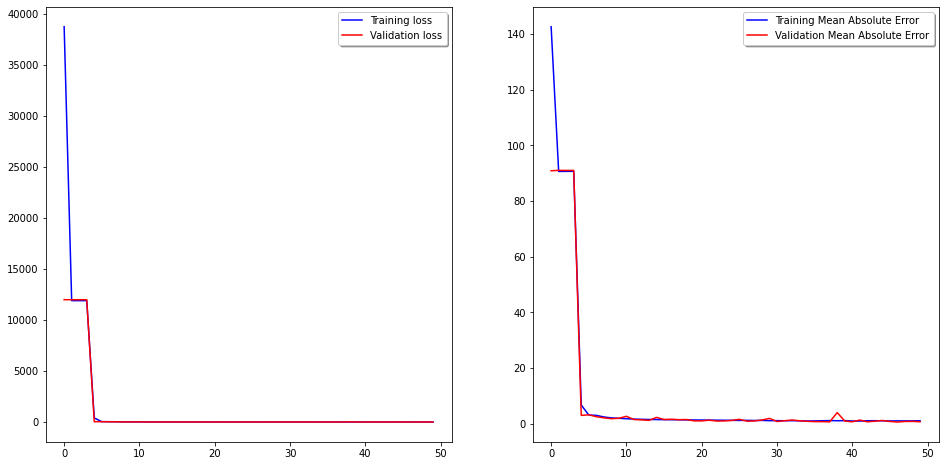

In [ ]:
model, history = Train(epochs=50, momentum=0.9)
modelos.append([model, history])

In [ ]:
print(len(modelos[0][1].history['val_mae']))

15


In [ ]:
colors = ['r', 'g', 'b', 'orange', 'yellow', 'black', 'purple']

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


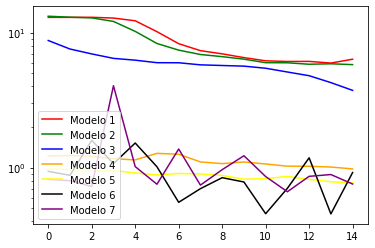

In [ ]:
for i in range(len(modelos)):
  aux = modelos[i][1].history['val_mae']
  plt.plot(aux[len(aux) - 15:], color=colors[i], label=('Modelo ' + str(i+1)))

plt.yscale('log')
plt.legend(loc='lower left')
plt.show()

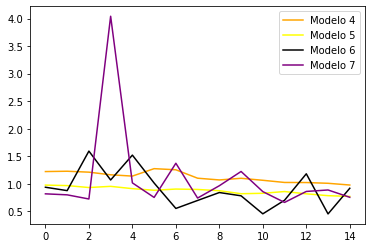

In [ ]:
for i in range(len(modelos)):
  if i > 2:
    aux = modelos[i][1].history['val_mae']
    plt.plot(aux[len(aux) - 15:], color=colors[i], label=('Modelo ' + str(i+1)))

plt.legend()
plt.show()

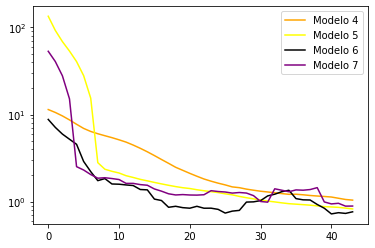

In [ ]:
for i in range(len(modelos)):
  if i > 2:
    aux = modelos[i][1].history['val_mae']
    plt.plot(moving_average(aux, 7), color=colors[i], label=('Modelo ' + str(i+1)))

plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
def predictResults(model):
  predictions = model.predict(X_test)
  aux = []
  for i in range(len(predictions)):
    aux.append(predictions[i][0])
  dif = np.array(aux) - np.array(y_test)
  dif = list(map(lambda x: x if x < 50 else 0, dif))

  return dif

In [ ]:
def ShowResults(model):
  dif = predictResults(model)
  plt.scatter(list(range(len(dif))), dif, color=colors[6])
  plt.show()
  plt.hist(dif, density=True, bins=1000, color=colors[6])
  plt.xlim((-20, 20))
  plt.show()
  print('99.72% dos resultados possuem um erro de mais ou menos {} pontos'.format(3 * np.std(dif)))
  print(np.std(dif))
  return dif

2503/2503 [==============================] - 4s 2ms/step


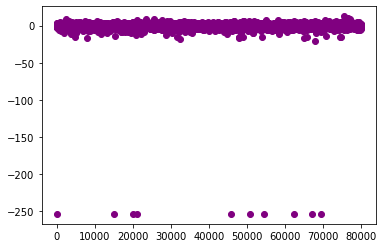

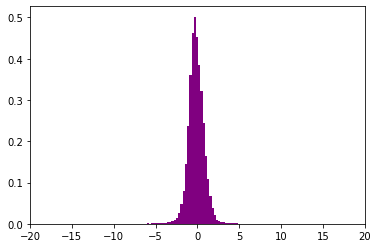

99.72% dos resultados possuem um erro de mais ou menos 9.016292976006667 pontos
3.005430992002222


In [ ]:
dif = ShowResults(modelos[6][0])

2503/2503 [==============================] - 4s 2ms/step


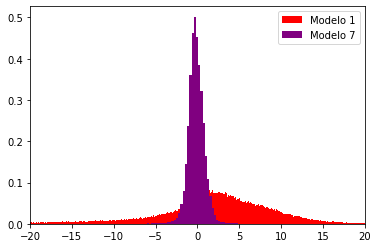

In [ ]:
dif = predictResults(modelos[0][0])
plt.hist(dif, density=True, bins=1000, color=colors[0], label='Modelo 1')
dif = predictResults(modelos[6][0])
plt.hist(dif, density=True, bins=1000, color=colors[6], label='Modelo 7')

plt.xlim((-20, 20))
plt.legend()
plt.show()

In [ ]:
def ShowPredictedResults(num):
  predictions = model.predict(X_test)
  aux = []
  for i in range(num):
    aux.append(predictions[i][0])
  X_axis = np.arange(num)
  plt.bar(X_axis - 0.2, aux, 0.4, color='b', label='predicted')
  plt.bar(X_axis + 0.2, y_test[:num], 0.4, color='r', label='real')
  plt.legend()
  plt.show()

In [ ]:
aux = []
for i in range(len(modelos)):
  dif = predictResults(modelos[i][0])
  soma = 0
  for j in range(len(dif)):
    temp = abs(dif[j])
    soma += temp
  aux.append(soma / len(dif))

2503/2503 [==============================] - 4s 2ms/step


In [ ]:
listaDeModelos = ['Modelo ' + str(x) for x in (np.array(range(len(modelos))) + 1)]

In [ ]:
print(listaDeModelos)

['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6', 'Modelo 7']


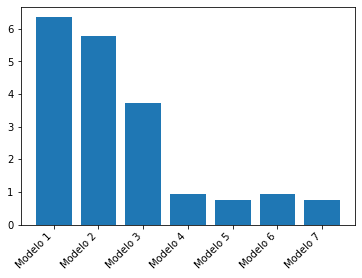

In [ ]:
plt.bar(listaDeModelos, aux)
plt.yscale('linear')
plt.xticks(rotation=45, ha="right")
plt.show()

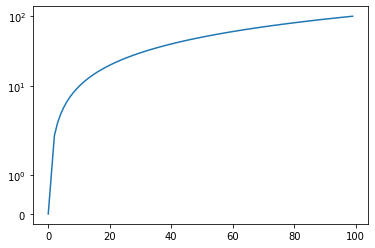

In [ ]:
plt.plot(list(range(100)))
plt.yscale('symlog')
plt.show()

2503/2503 [==============================] - 4s 2ms/step


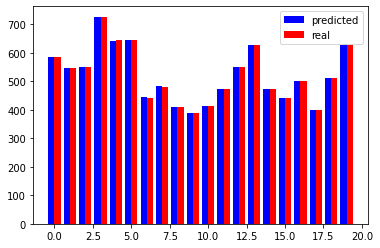

In [ ]:
ShowPredictedResults(20)